<a href="https://colab.research.google.com/github/SUNJIHEE/codestates_Project/blob/main/AI_14_%EC%84%A0%EC%A7%80%ED%9D%AC_Section2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **신용카드 사용자 연체 예측**
---
> **목차(Context)**

* 1 - 데이터 선정 이유 및 문제 정의
* 2 - 데이터 전처리, EDA, 시각화
* 3 - 모델링 ML

## **1.데이터 선정 이유 및 문제 정의**  
---


### **문제해결 프로세스 정의**
---
> **데이터 선정 이유**

```
▶ 금융 관련 문제중 주식관련 데이터로 프로젝트를 진행하고 싶어 데이터를 찾던 중 시계열 데이터가 아닌 다른 데이터가 좋을것 같다고 판단하여
그 다음으로 프로젝트를 진행해보고싶은 신용카드 사용자 연체 예측에 관한 데이터를 찾아 진행하게 되었습니다.
```  

> **문제정의**

```
▶ 사용자의 신용카드 연체로 인한 손실
```  

> **기대효과**

```
▶ 사용자의 신용카드 연체로 인한 손실 감소
```

> **태스크를 수행한 후, 다음 질문에 대답할 수 있어야 합니다.**  

```
▶ 내가 세운 가설이 문제 해결에 의미가 있나요?
▶ 해당 특성을 target으로 지정한 이유를 설명하세요
▶ Data Leakage가 있었나요? 없었다면 어떻게 방지했나요?
▶ 특성과 타겟의 관계 및 가설을 충분히 설명할 수 있는 시각화 결과를 제시했나요?
▶ 모델을 학습한 후에 베이스라인보다 잘 나왔나요? 그렇지 않다면 그 이유는 무엇일까요?
▶ 모델 성능 개선을 위해 어떤 방법을 적용했나요? 그 방법을 선택한 이유는 무엇인가요?
▶ 최종 모델과 일반화 성능에 관해 설명하세요.
▶ 모델이 관측치를 예측하기 위해서 어떤 특성을 활용했나요?
```

In [2]:
# Warnings 제거
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

# 경로 설정 
import os
os.chdir('/content/drive/MyDrive/코드스테이츠/Section2/Project')
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/코드스테이츠/Section2/Project'

### **데이터 살펴보기**
---



> **데이터**

|gender|car|reality|child_num|income_total|income_type|
|:---:|:---:|:---:|:---:|:---:|:---:|
|성별|자동차 소유 여부|부동산 소유 여부|자녀의 수|수입|소득 분류||
|edu_type|family_type|house_type|DAYS_BIRTH|DAYS_EMPLOYED|FLAG_MOBIL|
|교육 수준|결혼 여부|생활 방식|출생일|업무 시작일|핸드폰 소유 여부|
|work_phone|phone|email|occyp_type|family_size|begin_month|
|업무용 전화 소유 여부|전화 소유 여부|이메일 소유 여부|직업 유형|가족 구성원 인원수|신용카드 발급 월|
|credit|
|신용 기준|

In [45]:
# Data 불러오기

import pandas as pd 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv') 

# 필요 없는 열인 인덱스 열 제거

train = train.iloc[:,1:]
test = test.iloc[:,1:]

In [4]:
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


## **2. 데이터 전처리, EDA, 시각화**
---

### · Data 전처리  
---

In [5]:
# 26,457  row, 20 col로 구성됨
train.shape

(26457, 19)

In [6]:
# Data type 확인
train.info()

# credit object화
train = train.astype({'credit': 'object'})
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  FLAG_MOBIL     26457 non-null  int64  
 12  work_phone     26457 non-null  int64  
 13  phone          26457 non-null  int64  
 14  email          26457 non-null  int64  
 15  occyp_type     18286 non-null  object 
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
 18  credit

In [7]:
# Null 값 확인
print(train.isnull().sum())

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64


In [14]:
# occyp_type 8171개 결측치 NAN으로 채움
train.fillna('NaN', inplace=True) 
test.fillna('NaN', inplace=True)
print(train.isnull().sum())

gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
credit           0
dtype: int64


### · 이상치, 음수값 확인
---

In [8]:
train.describe().round(2)

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
count,26457.00,26457.00,26457.00,26457.00,26457.0,26457.00,26457.00,26457.00,26457.00,26457.00
mean,0.43,187306.52,-15958.05,59068.75,1.0,0.22,0.29,0.09,2.20,-26.12
std,0.75,101878.37,4201.59,137475.43,0.0,0.42,0.46,0.29,0.92,16.56
min,0.00,27000.00,-25152.00,-15713.00,1.0,0.00,0.00,0.00,1.00,-60.00
25%,0.00,121500.00,-19431.00,-3153.00,1.0,0.00,0.00,0.00,2.00,-39.00
50%,0.00,157500.00,-15547.00,-1539.00,1.0,0.00,0.00,0.00,2.00,-24.00
75%,1.00,225000.00,-12446.00,-407.00,1.0,0.00,1.00,0.00,3.00,-12.00
max,19.00,1575000.00,-7705.00,365243.00,1.0,1.00,1.00,1.00,20.00,0.00


In [9]:
# DAYS_EMPLOYED 값이 양수이면 무직생활한 기간임을 알 수 있다. 따라서 무직자로 판단하고 일한 기간을 0으로 처리한다.

train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)

In [10]:
import numpy as np
feats = ['DAYS_BIRTH', 'begin_month', 'DAYS_EMPLOYED']
for feat in feats:
    train[feat]=np.abs(train[feat])
    test[feat]=np.abs(test[feat])

In [11]:
train.describe().round(2)

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
count,26457.00,26457.00,26457.00,26457.00,26457.0,26457.00,26457.00,26457.00,26457.00,26457.00
mean,0.43,187306.52,15958.05,2198.53,1.0,0.22,0.29,0.09,2.20,26.12
std,0.75,101878.37,4201.59,2370.14,0.0,0.42,0.46,0.29,0.92,16.56
min,0.00,27000.00,7705.00,0.00,1.0,0.00,0.00,0.00,1.00,0.00
25%,0.00,121500.00,12446.00,407.00,1.0,0.00,0.00,0.00,2.00,12.00
50%,0.00,157500.00,15547.00,1539.00,1.0,0.00,0.00,0.00,2.00,24.00
75%,1.00,225000.00,19431.00,3153.00,1.0,0.00,1.00,0.00,3.00,39.00
max,19.00,1575000.00,25152.00,15713.00,1.0,1.00,1.00,1.00,20.00,60.00


In [12]:
train.child_num.unique()

array([ 0,  1,  2,  3,  4,  5, 14, 19,  7])

In [13]:
# 최소, 최대, 평균, 4분위수가 모두 1인 FLAG_MOBIL 열 삭제
# child_num 이상치 7, 14, 19 삭제

train.drop(['FLAG_MOBIL'], axis=1, inplace=True)
test.drop(['FLAG_MOBIL'], axis=1, inplace=True)
train = train[(train['family_size'] <= 7)]
train = train.reset_index(drop=True)
train.describe().round(2)

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month
count,26451.00,26451.00,26451.00,26451.00,26451.00,26451.00,26451.00,26451.00,26451.00
mean,0.43,187307.33,15958.20,2198.64,0.22,0.29,0.09,2.19,26.12
std,0.72,101887.76,4201.87,2370.40,0.42,0.46,0.29,0.90,16.56
min,0.00,27000.00,7705.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,0.00,121500.00,12446.00,407.00,0.00,0.00,0.00,2.00,12.00
50%,0.00,157500.00,15547.00,1539.00,0.00,0.00,0.00,2.00,24.00
75%,1.00,225000.00,19431.00,3153.00,0.00,1.00,0.00,3.00,39.00
max,5.00,1575000.00,25152.00,15713.00,1.00,1.00,1.00,7.00,60.00


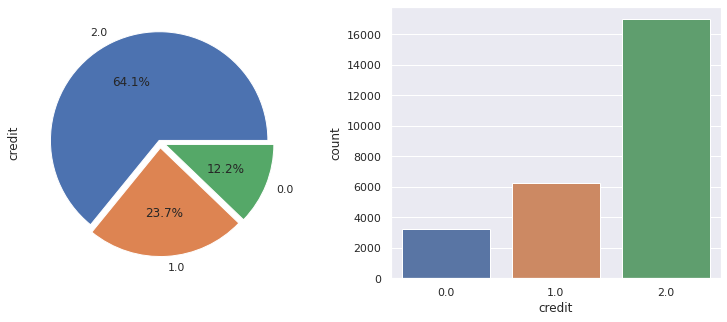

In [15]:
# 전체 데이터에서 각 신용 등급의 비율이 얼마나 되는지 확인해본다.
# 2등급 > 1등급 > 0등급 순서로 비율이 나타나는것을 보아 신용도가 낮은 사용자가 많은것을 확인하게 되었다.

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 1)
f, ax = plt.subplots(1, 2, figsize = (13,5))
train['credit'].value_counts().plot.pie(explode = [0.02, 0.05, 0.05],autopct = '%1.1f%%',ax = ax[0])
sns.countplot('credit', data=train, ax = ax[1])
plt.show()

각 feature별 신용등급의 비율을 확인하기 위해 그래프를 정의해준다.

In [16]:
train_0 = train[train['credit']==0.0]
train_1 = train[train['credit']==1.0]
train_2 = train[train['credit']==2.0]

def catplot(column):

  f, ax = plt.subplots(1, 3, figsize=(16, 6))

  sns.countplot(x = column,
                data = train_0,
                ax = ax[0],
                order = train_0[column].value_counts().index)
  ax[0].tick_params(labelsize=12)
  ax[0].set_title('credit = 0')
  ax[0].set_ylabel('count')
  ax[0].tick_params(rotation=40)

  sns.countplot(x = column,
                data = train_1,
                ax = ax[1],
                order = train_1[column].value_counts().index)
  ax[1].tick_params(labelsize=12)
  ax[1].set_title('credit = 1')
  ax[1].set_ylabel('count')
  ax[1].tick_params(rotation=40)
  
  sns.countplot(x = column,
                data = train_2,
                ax = ax[2],
                order = train_2[column].value_counts().index)
  ax[2].tick_params(labelsize=12)
  ax[2].set_title('credit = 2')
  ax[2].set_ylabel('count')
  ax[2].tick_params(rotation=40)
  plt.subplots_adjust(wspace=0.3, hspace=0.3)
  plt.show()

gender  credit
F       0.0        2148
        1.0        4220
        2.0       11326
M       0.0        1074
        1.0        2047
        2.0        5636
Name: credit, dtype: int64


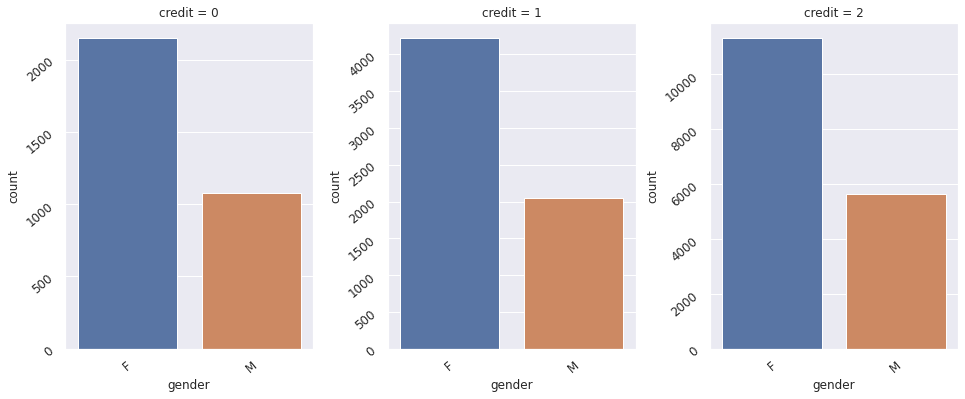

In [17]:
# 성별에 따른 신용도의 차이
# 수치 및 그래프로 확인 가능하듯이 여성이 남성보다 데이터가 많다.

print(train.groupby(['gender', 'credit'])['credit'].count())
catplot('gender')

car  credit
N    0.0        1982
     1.0        3990
     2.0       10435
Y    0.0        1240
     1.0        2277
     2.0        6527
Name: credit, dtype: int64


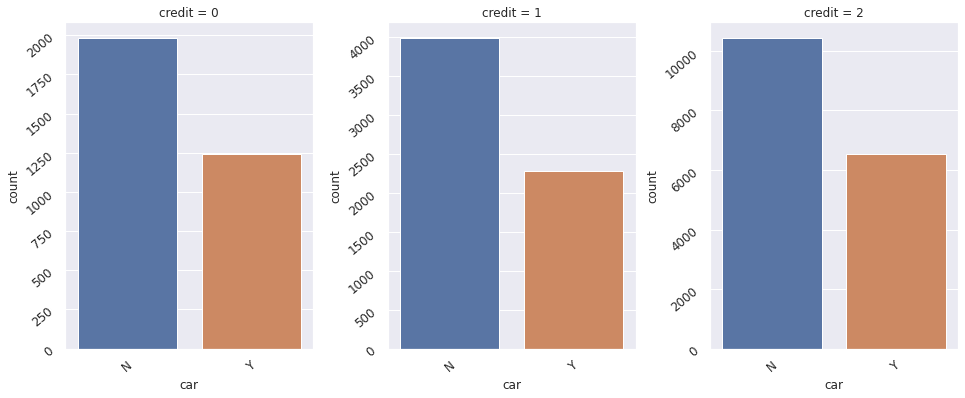

In [18]:
# 수치 및 그래프로 0등급> 1등급 > 2등급 순서로 차량을 소유하고 있음을 알 수 있다.
# 신용이 높을수록 자동차를 소유하고 있는 고객이 많다.

print(train.groupby(['car', 'credit'])['credit'].count())
catplot('car')

reality  credit
N        0.0        1064
         1.0        1935
         2.0        5626
Y        0.0        2158
         1.0        4332
         2.0       11336
Name: credit, dtype: int64


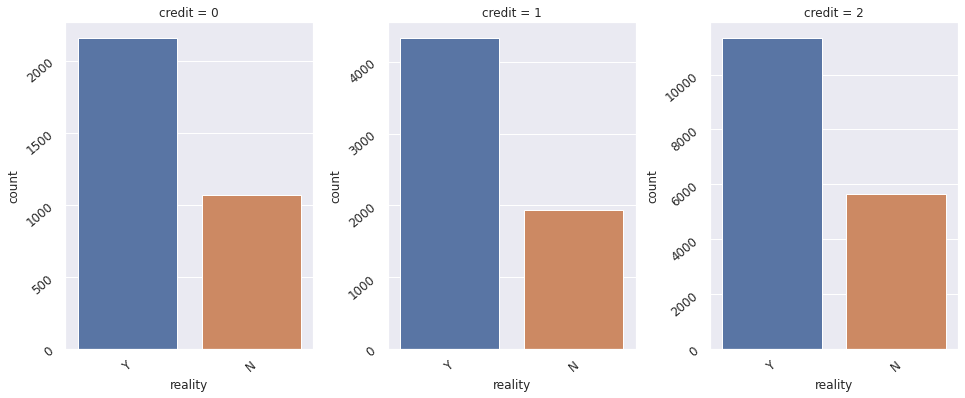

In [19]:
# 모든 등급에서 부동산을 소지하고 있는 사람이 부동산을 소지하고 있지 않은 사람들보다 약 2배가량 존재함을 확인할 수 있다.

print(train.groupby(['reality', 'credit'])['credit'].count())
catplot('reality')

income_type           credit
Commercial associate  0.0        782
                      1.0       1344
                      2.0       4076
Pensioner             0.0        536
                      1.0       1084
                      2.0       2829
State servant         0.0        265
                      1.0        489
                      2.0       1400
Student               1.0          3
                      2.0          4
Working               0.0       1639
                      1.0       3347
                      2.0       8653
Name: credit, dtype: int64


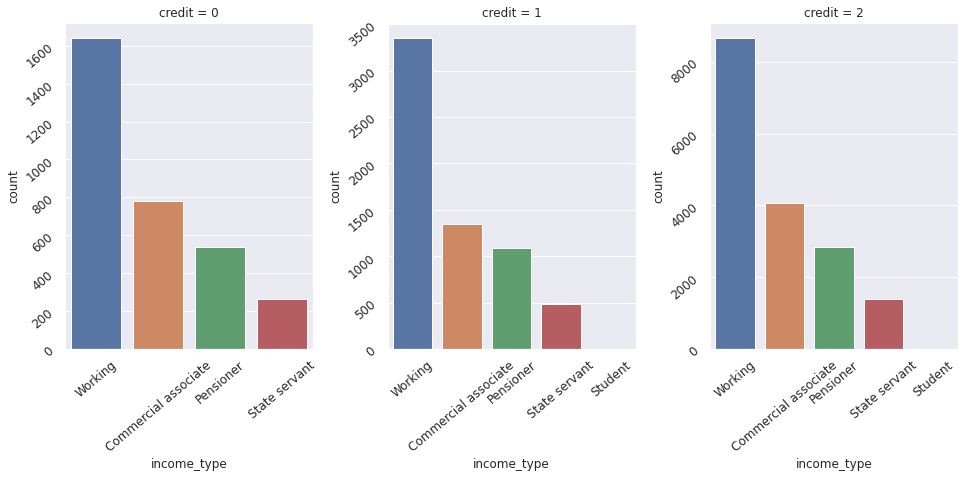

In [20]:
# 학생은 0등급에 한면도 존재하지 않음을 수치와 그래프상으로 확인이 가능하다.
# 일을 하는게 아닌 공부를 하는 학생 특성상 신용도가 낮을 수 밖에 없음을 유추할 수 있다.  

print(train.groupby(['income_type', 'credit'])['credit'].count())
catplot('income_type')

edu_type                       credit
Academic degree                0.0           2
                               1.0           7
                               2.0          14
Higher education               0.0         909
                               1.0        1751
                               2.0        4502
Incomplete higher              0.0         114
                               1.0         246
                               2.0         660
Lower secondary                0.0          28
                               1.0          59
                               2.0         170
Secondary / secondary special  0.0        2169
                               1.0        4204
                               2.0       11616
Name: credit, dtype: int64


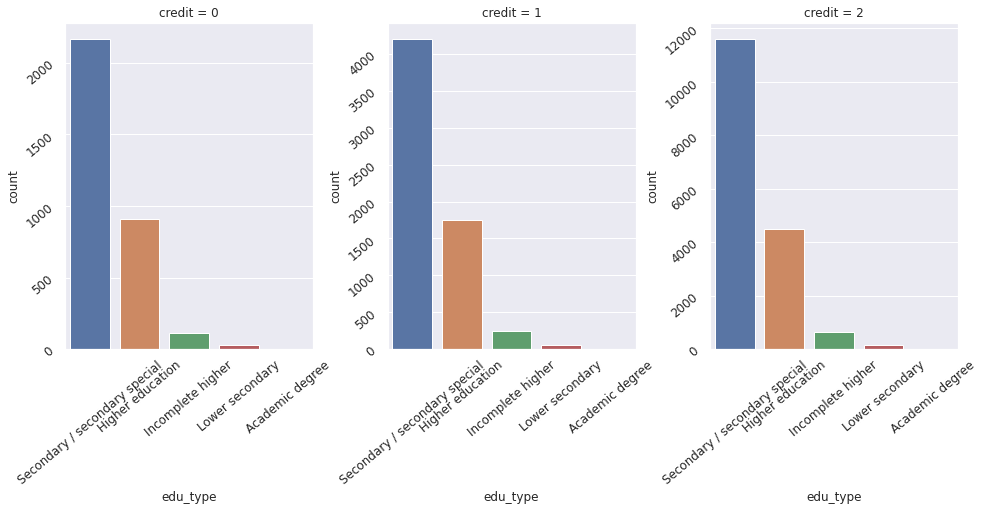

In [21]:
# 모든 등급에 같은 순위임을 확인할 수 있다.
# Academic degree 대졸, Higher education 고등교육 졸업, Incomplete higher 고등교육 이수
# Lower secondary 중학교 이수, Secondary 중등교육

print(train.groupby(['edu_type', 'credit'])['credit'].count())
catplot('edu_type')

family_type           credit
Civil marriage        0.0         288
                      1.0         539
                      2.0        1296
Married               0.0        2213
                      1.0        4140
                      2.0       11841
Separated             0.0         193
                      1.0         349
                      2.0         994
Single / not married  0.0         402
                      1.0         940
                      2.0        2153
Widow                 0.0         126
                      1.0         299
                      2.0         678
Name: credit, dtype: int64


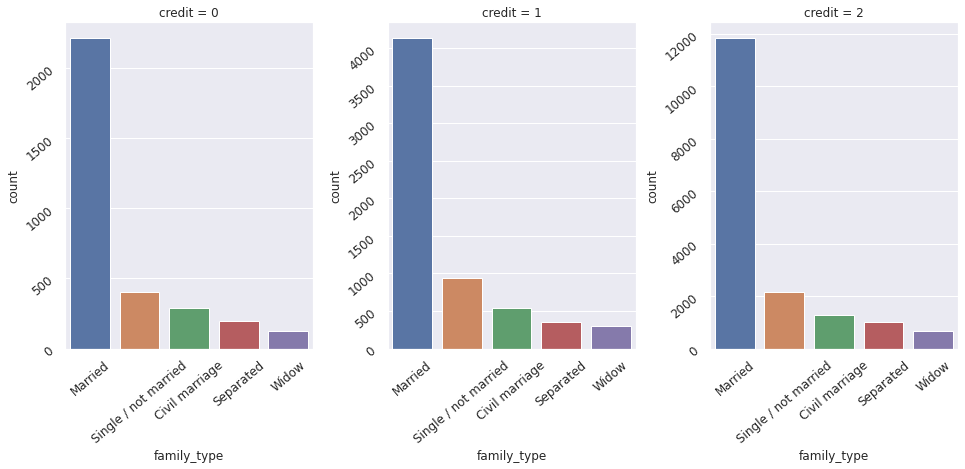

In [22]:
# 결혼을 하지 않은 사람보다 결혼을 한 사람이 많다.

print(train.groupby(['family_type', 'credit'])['credit'].count())
catplot('family_type')

In [47]:
import numpy as np
train['age'] = round(abs(train['DAYS_BIRTH'])/365.5,0).astype(np.int32)
test['age'] = round(abs(test['DAYS_BIRTH'])/365.5,0).astype(np.int32)
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,38
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,31
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0,52
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0,41
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0,41


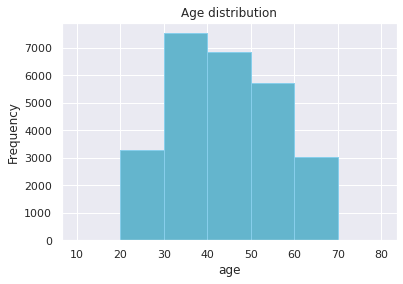

In [24]:
train['age'].plot.hist(bins=range(10,81,10),color='c', edgecolor='skyblue')
plt.xlabel('age')
plt.title('Age distribution')
plt.show()

## **3.모델링 ML**
---

### · 모델링을 위한 데이터 준비
---


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

target = 'credit'
train, val = train_test_split(train, test_size=len(test), 
                              stratify=train[target], random_state=2)


train.shape, val.shape, test.shape

((16451, 19), (10000, 19), (10000, 18))

In [27]:
features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

### · 모델 학습 및 평가
---
* 모델을 학습하고 예측을 수행하여 성능을 평가

In [28]:
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
)

pipe

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_jobs=-1, random_state=2))])

In [29]:
from sklearn.metrics import classification_report
# train 학습, 검증셋 정확도
pipe.fit(X_train, y_train)
print('검증 정확도', pipe.score(X_val, y_val))

print(classification_report(y_val, pipe.predict(X_val)))

검증 정확도 0.7041
              precision    recall  f1-score   support

         0.0       0.45      0.26      0.33      1218
         1.0       0.60      0.47      0.53      2369
         2.0       0.75      0.87      0.81      6413

    accuracy                           0.70     10000
   macro avg       0.60      0.54      0.56     10000
weighted avg       0.68      0.70      0.68     10000



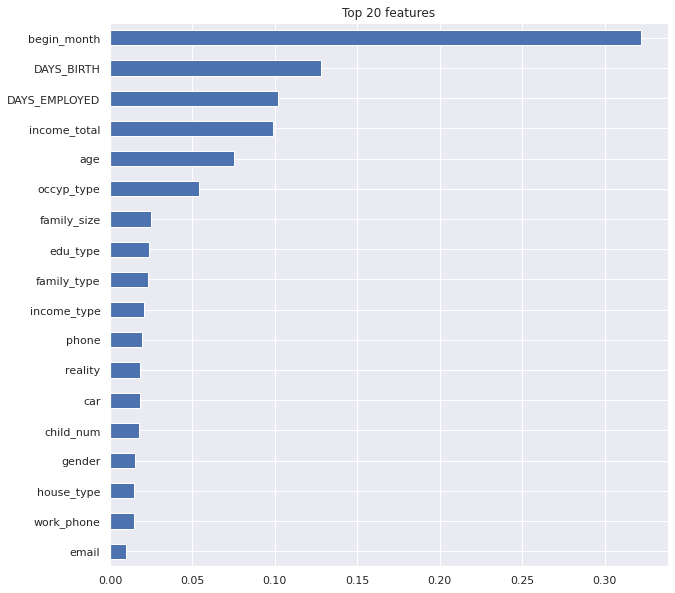

In [30]:
rf = pipe.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [31]:
column  = 'begin_month'

# begin_month 없이 fit
pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
)
pipe.fit(X_train.drop(columns=column), y_train)
score_without = pipe.score(X_val.drop(columns=column), y_val)
print(f'검증 정확도 ({column} 제외): {score_without}')

# begin_monte 포함 후 다시 학습
pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
)
pipe.fit(X_train, y_train)
score_with = pipe.score(X_val, y_val)
print(f'검증 정확도 ({column} 포함): {score_with}')

# begin_month 포함 전 후 정확도 차이를 계산합니다
print(f'{column}의 Drop-Column 중요도: {score_with - score_without}')

검증 정확도 (begin_month 제외): 0.6819
검증 정확도 (begin_month 포함): 0.7041
begin_month의 Drop-Column 중요도: 0.022199999999999998


In [32]:
feature = 'begin_month'
X_val[feature].head()

20076     8.0
7257     19.0
17279    56.0
25492    14.0
19277    28.0
Name: begin_month, dtype: float64

In [33]:
X_val[feature].value_counts()

7.0     256
8.0     240
6.0     233
16.0    231
4.0     224
       ... 
58.0     91
60.0     85
56.0     85
59.0     81
57.0     76
Name: begin_month, Length: 61, dtype: int64

In [34]:
X_val_permuted = X_val.copy()
X_val_permuted[feature] = np.random.RandomState(seed=7).permutation(X_val_permuted[feature])

In [35]:
score_permuted = pipe.score(X_val_permuted, y_val)

print(f'검증 정확도 ({feature}): {score_with}')
print(f'검증 정확도 (permuted "{feature}"): {score_permuted}')
print(f'순열 중요도: {score_with - score_permuted}')

검증 정확도 (begin_month): 0.7041
검증 정확도 (permuted "begin_month"): 0.6329
순열 중요도: 0.07119999999999993


In [36]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
from xgboost import XGBClassifier

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2
                 )
)

pipe.fit(X_train, y_train);

In [38]:
from sklearn.metrics import accuracy_score
y_pred = pipe.predict(X_val)
print('검증 정확도: ', accuracy_score(y_val, y_pred))

print(classification_report(y_pred, y_val))

검증 정확도:  0.7065
              precision    recall  f1-score   support

         0.0       0.15      0.51      0.23       364
         1.0       0.38      0.64      0.48      1395
         2.0       0.93      0.73      0.82      8241

    accuracy                           0.71     10000
   macro avg       0.49      0.62      0.51     10000
weighted avg       0.83      0.71      0.75     10000



### · Hyper parameter 튜닝
---
* 모델 성능을 올리기 위한 옵션 조절

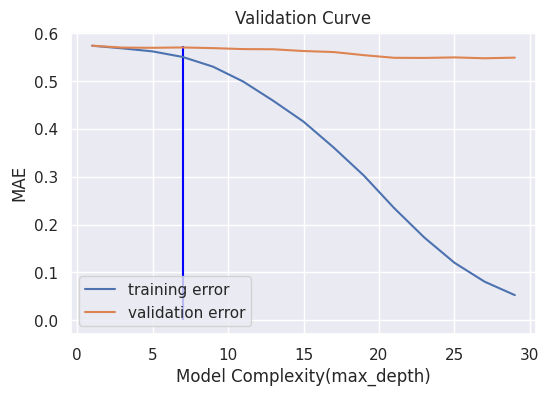

In [42]:
import matplotlib.pyplot as plt
from category_encoders import OrdinalEncoder
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    DecisionTreeRegressor()
)

depth = range(1, 30, 2)
ts, vs = validation_curve(
    pipe, X_train, y_train
    , param_name='decisiontreeregressor__max_depth'
    , param_range=depth, scoring='neg_mean_absolute_error'
    , cv=3
    , n_jobs=-1
)

train_scores_mean = np.mean(-ts, axis=1)
validation_scores_mean = np.mean(-vs, axis=1)

fig, ax = plt.subplots()
ax.plot(depth, train_scores_mean, label='training error')
ax.plot(depth, validation_scores_mean, label='validation error')
ax.vlines(7,0, train_scores_mean.max(), color='blue')
ax.set(title='Validation Curve'
      , xlabel='Model Complexity(max_depth)', ylabel='MAE')
ax.legend()
fig.dpi = 100

데이터 출처 https://dacon.io/competitions/official/235713/overview/description